In [437]:
import pandas as pd
%matplotlib inline
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read the data

In [438]:
df_netflix_short_titles = pd.read_csv("netflix_genres_main.csv")
viewingActivityDataFrame = pd.read_csv("netflix_genres.csv")
# viewingActivityDataFrame as df_netflix_genres

/Users/sjoshi2/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [439]:
viewingActivityDataFrame['title'] = viewingActivityDataFrame['short_title']
viewingActivityDataFrame = viewingActivityDataFrame.drop(['Title', 'short_title'], axis=1)

In [440]:
viewingActivityDataFrame

,Start Time,Duration,title
0,12/31/16 0:30,0:01:19,7:19
1,3/5/18 4:35,0:05:18,300
2,4/7/19 5:29,0:18:56,706
3,4/6/19 5:20,1:31:56,706
4,4/6/19 3:07,1:06:03,706
...,...,...,...
1048570,NaN,NaN,#VALUE!
1048571,NaN,NaN,#VALUE!
1048572,NaN,NaN,#VALUE!
1048573,NaN,NaN,#VALUE!


In [441]:
df_netflix_activity=pd.merge(viewingActivityDataFrame, df_netflix_short_titles, on='title', how='inner')

In [442]:
df_netflix_activity

,Start Time,Duration,title,type,listed_in
0,12/31/16 0:30,0:01:19,7:19,Movie,"Dramas, International Movies"
1,4/7/19 5:29,0:18:56,706,Movie,"Horror Movies, International Movies"
2,4/6/19 5:20,1:31:56,706,Movie,"Horror Movies, International Movies"
3,4/6/19 3:07,1:06:03,706,Movie,"Horror Movies, International Movies"
4,4/5/19 5:52,0:25:32,706,Movie,"Horror Movies, International Movies"
...,...,...,...,...,...
13932,5/10/20 2:14,0:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"
13933,5/10/20 1:54,0:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"
13934,5/10/20 1:39,0:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"
13935,5/6/20 3:11,0:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"


In [444]:
# Convert Start time to Pacific Time Zone
df_netflix_activity['Start Time'] = pd.to_datetime(df_netflix_activity['Start Time'], utc = True)
df_netflix_activity = df_netflix_activity.set_index('Start Time')
df_netflix_activity.index = df_netflix_activity.index.tz_convert('US/Pacific')
df_netflix_activity = df_netflix_activity.reset_index()

# Extract weekday and hour from Start Time 
df_netflix_activity['weekday'] = df_netflix_activity['Start Time'].dt.weekday
df_netflix_activity['hour'] = df_netflix_activity['Start Time'].dt.hour
df_netflix_activity.head(10)

,Start Time,Duration,title,type,listed_in,weekday,hour
0,2016-12-30 16:30:00-08:00,0:01:19,7:19,Movie,"Dramas, International Movies",4,16
1,2019-04-06 22:29:00-07:00,0:18:56,706,Movie,"Horror Movies, International Movies",5,22
2,2019-04-05 22:20:00-07:00,1:31:56,706,Movie,"Horror Movies, International Movies",4,22
3,2019-04-05 20:07:00-07:00,1:06:03,706,Movie,"Horror Movies, International Movies",4,20
4,2019-04-04 22:52:00-07:00,0:25:32,706,Movie,"Horror Movies, International Movies",3,22
5,2019-04-04 21:52:00-07:00,0:00:19,706,Movie,"Horror Movies, International Movies",3,21
6,2020-11-03 20:23:00-08:00,0:01:47,1922,Movie,"Dramas, Thrillers",1,20
7,2020-03-21 13:58:00-07:00,0:06:19,3022,Movie,"Independent Movies, Sci-Fi & Fantasy, Thrillers",5,13
8,2020-03-20 22:03:00-07:00,0:00:39,3022,Movie,"Independent Movies, Sci-Fi & Fantasy, Thrillers",4,22
9,2020-08-29 22:23:00-07:00,0:35:10,22-Jul,Movie,"Dramas, Thrillers",5,22


In [445]:
df_netflix_activity['Duration']= pd.to_timedelta(df_netflix_activity['Duration'])

In [447]:
genres_split_df=df_netflix_activity["listed_in"].str.split(",", n = 5, expand = True)
df_netflix_activity['genre1'] = genres_split_df[0]
df_netflix_activity['genre2'] = genres_split_df[1]
df_netflix_activity['genre3'] = genres_split_df[2]

df_netflix_activity

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3
0,2016-12-30 16:30:00-08:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,16,Dramas,International Movies,None
1,2019-04-06 22:29:00-07:00,00:18:56,706,Movie,"Horror Movies, International Movies",5,22,Horror Movies,International Movies,None
2,2019-04-05 22:20:00-07:00,01:31:56,706,Movie,"Horror Movies, International Movies",4,22,Horror Movies,International Movies,None
3,2019-04-05 20:07:00-07:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,20,Horror Movies,International Movies,None
4,2019-04-04 22:52:00-07:00,00:25:32,706,Movie,"Horror Movies, International Movies",3,22,Horror Movies,International Movies,None
...,...,...,...,...,...,...,...,...,...,...
13932,2020-05-09 19:14:00-07:00,00:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,19,International TV Shows,Reality TV,None
13933,2020-05-09 18:54:00-07:00,00:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None
13934,2020-05-09 18:39:00-07:00,00:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None
13935,2020-05-05 20:11:00-07:00,00:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",1,20,International TV Shows,Reality TV,None


### Get the hour and weekday and split the genres. Assume that Genre1 defines the movie more than Genre2. So if Title A is Drama and Thriller, it is more of a Drama than Thriller.

In [448]:
df_netflix_activity.head()

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3
0,2016-12-30 16:30:00-08:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,16,Dramas,International Movies,None
1,2019-04-06 22:29:00-07:00,00:18:56,706,Movie,"Horror Movies, International Movies",5,22,Horror Movies,International Movies,None
2,2019-04-05 22:20:00-07:00,01:31:56,706,Movie,"Horror Movies, International Movies",4,22,Horror Movies,International Movies,None
3,2019-04-05 20:07:00-07:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,20,Horror Movies,International Movies,None
4,2019-04-04 22:52:00-07:00,00:25:32,706,Movie,"Horror Movies, International Movies",3,22,Horror Movies,International Movies,None


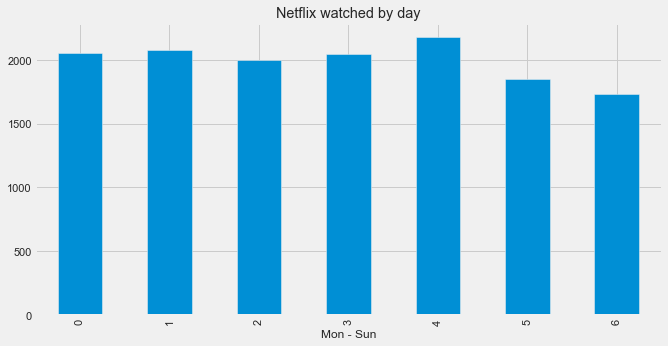

In [469]:
# convert weekday to Categorical data type
df_netflix_activity['weekday']=pd.Categorical(df_netflix_activity['weekday'],categories=[0,1,2,3,4,5,6],ordered=True)
netflix_by_day = df_netflix_activity['weekday'].value_counts().sort_index()
matplotlib.rcParams.update({'font.size':10})
g= netflix_by_day.plot(kind='bar', figsize=(10,5), title = 'Netflix watched by day');
g.set_xlabel('Mon - Sun');

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,Duration_Hours
0,2016-12-30 16:30:00-08:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,16,Dramas,International Movies,None,0.021944
1,2019-04-06 22:29:00-07:00,00:18:56,706,Movie,"Horror Movies, International Movies",5,22,Horror Movies,International Movies,None,0.315556
2,2019-04-05 22:20:00-07:00,01:31:56,706,Movie,"Horror Movies, International Movies",4,22,Horror Movies,International Movies,None,1.532222
3,2019-04-05 20:07:00-07:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,20,Horror Movies,International Movies,None,1.100833
4,2019-04-04 22:52:00-07:00,00:25:32,706,Movie,"Horror Movies, International Movies",3,22,Horror Movies,International Movies,None,0.425556
...,...,...,...,...,...,...,...,...,...,...,...
13932,2020-05-09 19:14:00-07:00,00:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,19,International TV Shows,Reality TV,None,0.302778
13933,2020-05-09 18:54:00-07:00,00:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None,0.311667
13934,2020-05-09 18:39:00-07:00,00:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None,0.228056
13935,2020-05-05 20:11:00-07:00,00:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",1,20,International TV Shows,Reality TV,None,0.016111


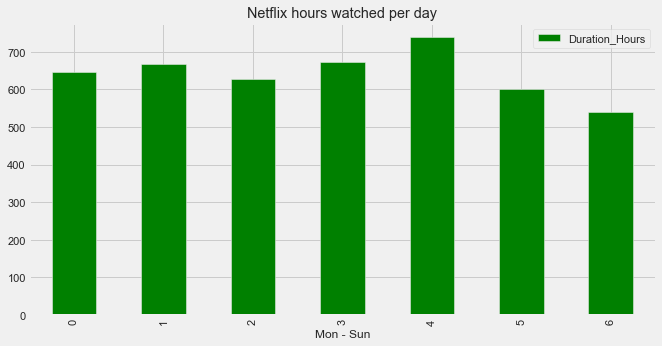

In [510]:
# Calculate Average number of minutes / hours of Netflix watched by day
#df_netflix_activity['Duration'].dt.total_minutes().astype(int)
    
hours_spent_on_netflix_by_day = df_netflix_activity.groupby('weekday')['Duration_Hours'].sum().reset_index()
k= hours_spent_on_netflix_by_day.plot(kind='bar', figsize=(10,5), color='green' ,title = 'Netflix hours watched per day');
h.set_xlabel('Mon - Sun');



#d=pd.DataFrame({'tv_shows_by_hour':tv_shows_by_hour, 'movies_by_hour':movies_by_hour})
#d.plot.bar(alpha=0.5, color=['blue', 'green'],figsize=(20, 10), title='Area Plot', fontsize=12)

### Above - Overall Netflix Watch Pattern is slightly lower on weekends than weekdays

Text(0.5, 0, 'Views By Hour - AM to PM')

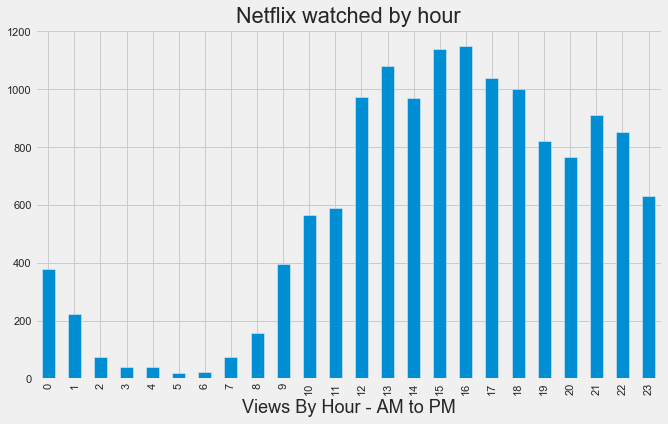

In [459]:
# set our categorical and define the order so the hours are plotted 0-23
df_netflix_activity['hour'] = pd.Categorical(df_netflix_activity['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
# create netflix_by_hour and count the rows for each hour, assigning the result to that variable
netflix_by_hour = df_netflix_activity['hour'].value_counts()
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
netflix_by_hour = netflix_by_hour.sort_index()
# plot netflix_by_hour as a bar chart with the listed size,title and label
h=netflix_by_hour.plot(kind='bar', figsize=(10,6), title = 'Netflix watched by hour');
h.set_xlabel('Views By Hour - AM to PM')

### I watch netflix most between 6 and 8 pm and least between 3 AM and Noon

In [501]:
tv_shows = df_netflix_activity[df_netflix_activity['type'].str.contains('^TV',regex=True)]

In [502]:
tv_shows.tail()

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,Duration_Hours
13932,2020-05-09 19:14:00-07:00,00:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,19,International TV Shows,Reality TV,None,0.302778
13933,2020-05-09 18:54:00-07:00,00:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None,0.311667
13934,2020-05-09 18:39:00-07:00,00:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None,0.228056
13935,2020-05-05 20:11:00-07:00,00:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",1,20,International TV Shows,Reality TV,None,0.016111
13936,2017-12-15 00:48:00-08:00,00:24:14,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",4,0,International TV Shows,Reality TV,None,0.403889


/Users/sjoshi2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Views By Hour - AM to PM')

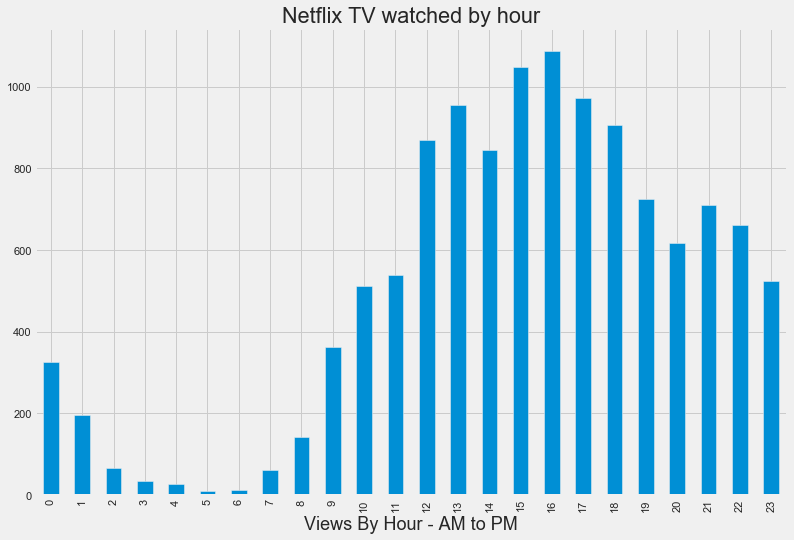

In [462]:
# set our categorical and define the order so the hours are plotted 0-23
tv_shows['hour'] = pd.Categorical(tv_shows['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
# create tv_shows_by_hour and count the rows for each hour, assigning the result to that variable
tv_shows_by_hour = tv_shows['hour'].value_counts()
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
tv_shows_by_hour = tv_shows_by_hour.sort_index()
# plot tv_shows_by_hour as a bar chart with the listed size,title and label
h=tv_shows_by_hour.plot(kind='bar', figsize=(12,8), title = 'Netflix TV watched by hour');
h.set_xlabel('Views By Hour - AM to PM')

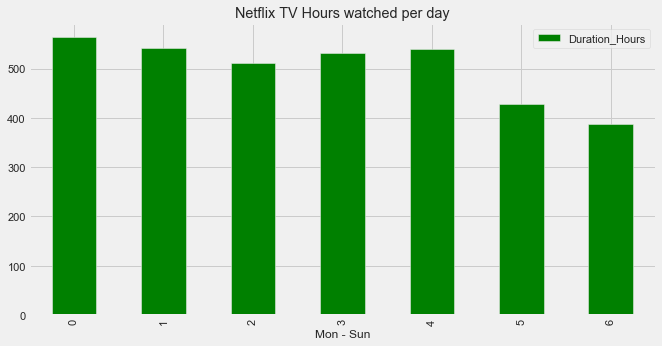

In [511]:
hours_spent_on_netflix_by_day_for_tv = tv_shows.groupby('weekday')['Duration_Hours'].sum().reset_index()
i= hours_spent_on_netflix_by_day_for_tv.plot(kind='bar', figsize=(10,5), color='green' ,title = 'Netflix TV Hours watched per day');
i.set_xlabel('Mon - Sun');

### Most TV is watched around 7 PM

In [505]:
movies = df_netflix_activity[df_netflix_activity['type'].str.contains('^Movie',regex=True)]

/Users/sjoshi2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Views By Hour - AM to PM')

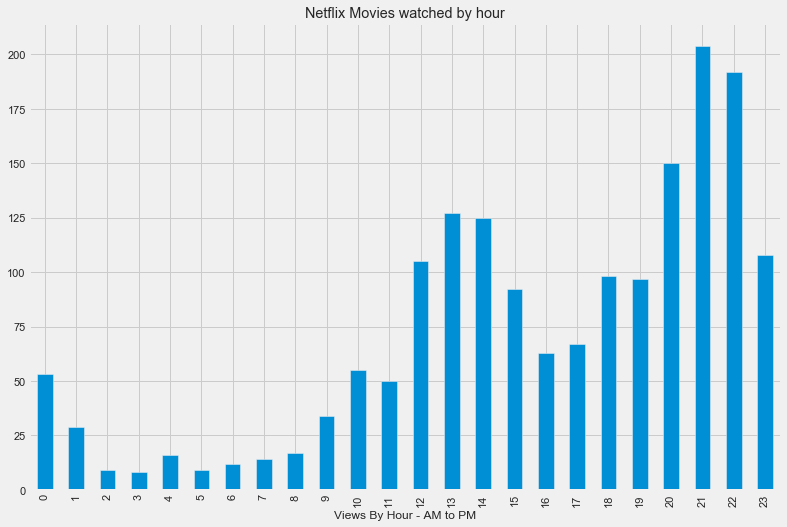

In [506]:
# set our categorical and define the order so the hours are plotted 0-23
movies['hour'] = pd.Categorical(movies['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
# create movies_by_hour and count the rows for each hour, assigning the result to that variable
movies_by_hour = movies['hour'].value_counts()
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
movies_by_hour = movies_by_hour.sort_index()
# plot movies_by_hour as a bar chart with the listed size,title and label
h=movies_by_hour.plot(kind='bar', figsize=(12,8), title = 'Netflix Movies watched by hour');
h.set_xlabel('Views By Hour - AM to PM')

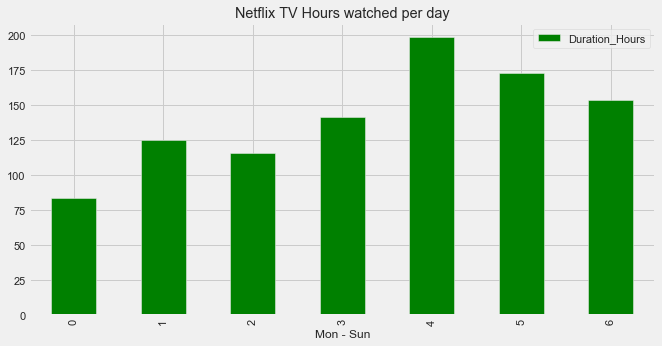

In [512]:
hours_spent_on_netflix_by_day_for_movies = movies.groupby('weekday')['Duration_Hours'].sum().reset_index()
j= hours_spent_on_netflix_by_day_for_movies.plot(kind='bar', figsize=(10,5), color='green' ,title = 'Netflix TV Hours watched per day');
j.set_xlabel('Mon - Sun');

### Most Movies are watched around midnight

In [465]:
movies_by_genres = movies['genre1'].value_counts()

Text(0.5, 0, 'Netflix Movies Genres Viewing Histogram')

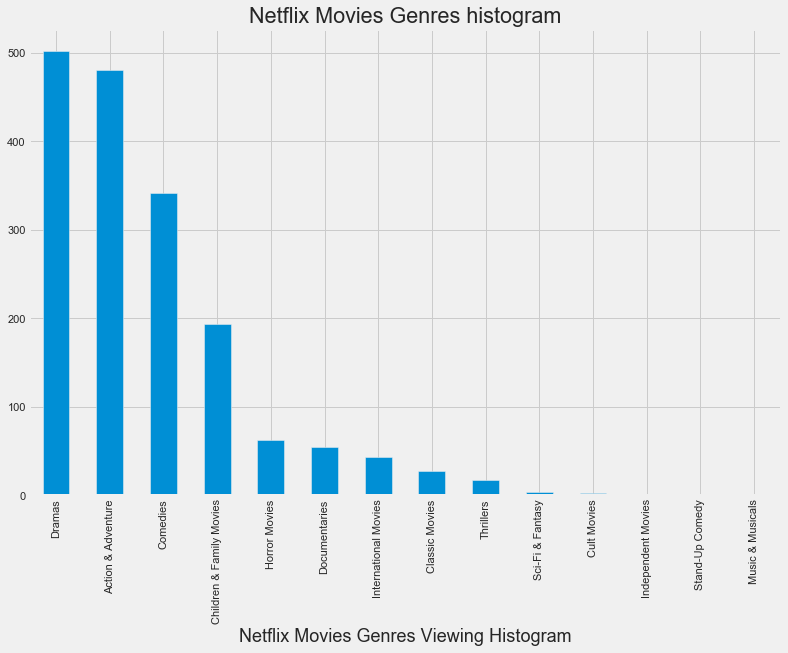

In [466]:
h=movies_by_genres.plot(kind='bar', figsize=(12,8), title = 'Netflix Movies Genres histogram');
h.set_xlabel('Netflix Movies Genres Viewing Histogram')

### Dramas and Action and Adventure are my top favorite Genres for Movies, least interested in Musicals

Text(0.5, 0, 'Netflix TV Genres Viewing Histogram')

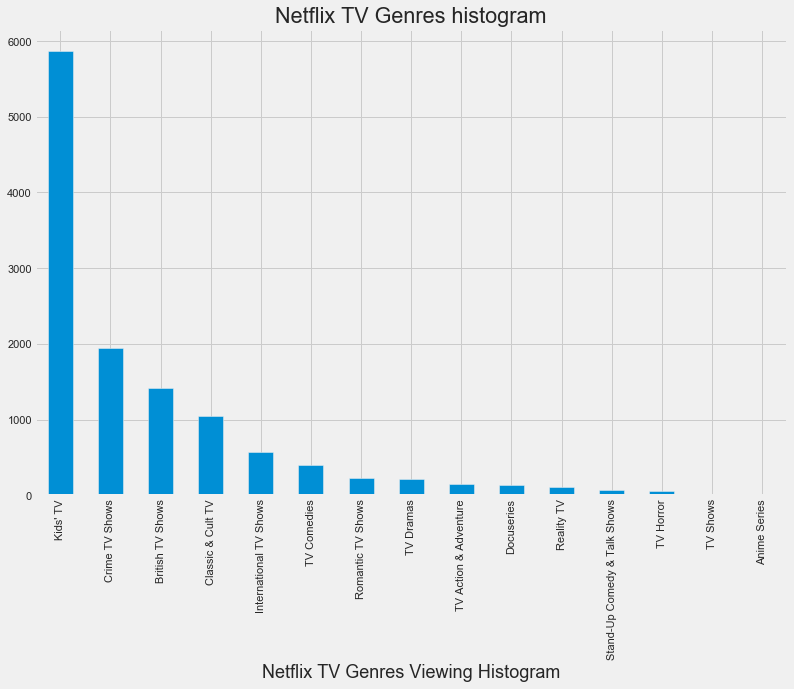

In [467]:
tv_shows_by_genre = tv_shows['genre1'].value_counts()
h=tv_shows_by_genre.plot(kind='bar', figsize=(12,8), title = 'Netflix TV Genres histogram');
h.set_xlabel('Netflix TV Genres Viewing Histogram')

### Most watched TV show genres are Kids TV and Crime TV Shows, least watched is Animes

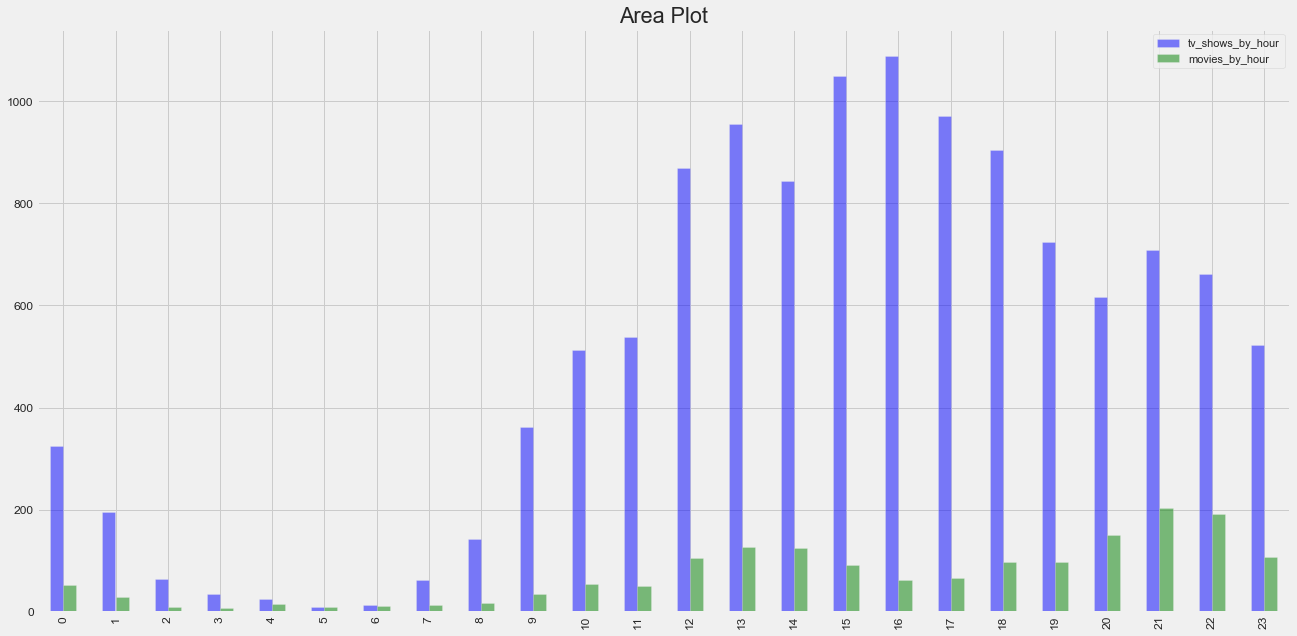

In [468]:
d=pd.DataFrame({'tv_shows_by_hour':tv_shows_by_hour, 'movies_by_hour':movies_by_hour})
d.plot.bar(alpha=0.5, color=['blue', 'green'],figsize=(20, 10), title='Area Plot', fontsize=12)

### I spend more a lot more time watching TV shows than Movies

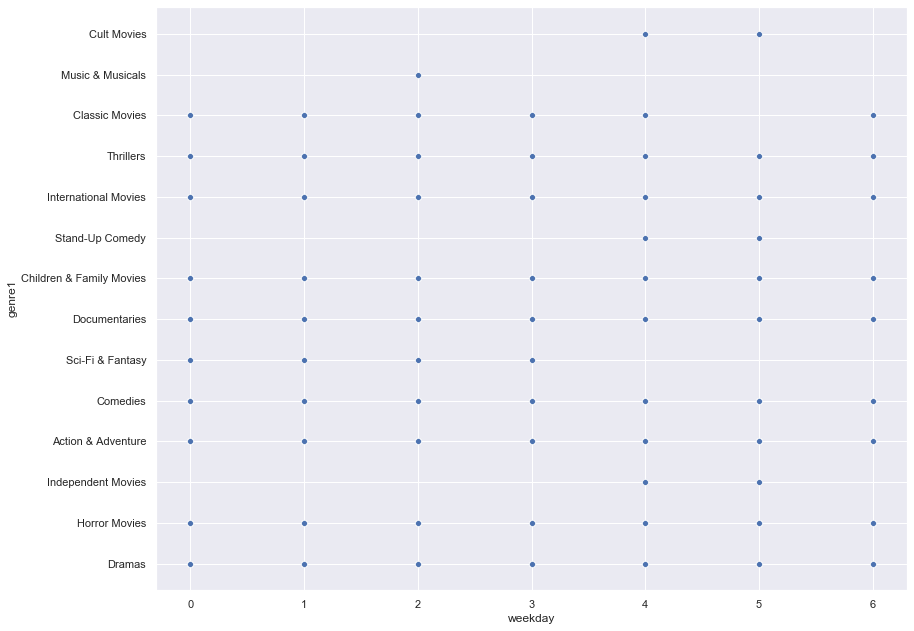

In [514]:
# make the plots bigger
sns.set(rc={'figure.figsize':(12,10)})

# create the scatter plot and regression line
#sns.regplot(x="hour", y="genre1", data=movies);

sns.scatterplot(x="weekday", y="genre1",data=movies);

### I barely watch Stand Up Comedies Monday through Thursday
### I can watch International Movies (Bollywood?? ) or Thrillers on any day
### However, Cult or Independant movies are reserved for weekends

In [ ]:
movies['genre1'].value_counts()

In [ ]:
movies.groupby(['hour'])['genre1'].value_counts()

In [ ]:
movies.head()

In [ ]:
movies.sort_values(by=['hour', 'genre1'])

In [515]:
movies.groupby(['hour'])['genre1'].describe(include='all')

,count,unique,top,freq
hour,,,,
0,53,9,Action & Adventure,23
1,29,4,Dramas,14
2,9,3,Dramas,5
3,8,5,Dramas,4
4,16,5,Action & Adventure,5
5,9,4,Dramas,4
6,12,6,Dramas,4
7,14,4,Children & Family Movies,6
8,17,5,Dramas,8


### I really love watching Action and Adventure at midnight, Dramas are my second best category

In [ ]:
movies.groupby(['weekday'])['genre1'].describe()

In [ ]:
tv_shows.groupby(['weekday'])['genre1'].describe()

### I watch Kids TV every single day

In [ ]:
tv_shows.groupby(['hour'])['genre1'].describe()

### Late nights are mainly reserved for Crime TV Shows or Classic, Cult Shows. 
### Kids TV is watched peak at 7 PM

In [516]:
movies.groupby(['hour','genre1','genre2']).count()

Start Time  Duration  \
hour genre1             genre2                                            
0    Action & Adventure  Anime Features                   NaN       NaN   
                         Children & Family Movies         1.0       1.0   
                         Classic Movies                   NaN       NaN   
                         Comedies                         3.0       3.0   
                         Cult Movies                      NaN       NaN   
...                                                       ...       ...   
23   Thrillers           Music & Musicals                 NaN       NaN   
                         Romantic Movies                  NaN       NaN   
                         Sci-Fi & Fantasy                 NaN       NaN   
                         Sports Movies                    NaN       NaN   
                         Thrillers                        NaN       NaN   

                                                   title  type  listed_in  \
hour genre1             genre2                                              
0    Action & Adventure  Anime Features              NaN   NaN        NaN   
                         Children & Family Movies    1.0   1.0        1.0   
                         Classic Movies              NaN   NaN        NaN   
                         Comedies                    3.0   3.0        3.0   
                         Cult Movies                 NaN   NaN        NaN   
...                                                  ...   ...        ...   
23   Thrillers           Music & Musicals            NaN   NaN        NaN   
                         Romantic Movies             NaN   NaN        NaN   
                         Sci-Fi & Fantasy            NaN   NaN        NaN   
                         Sports Movies               NaN   NaN        NaN   
                         Thrillers                   NaN   NaN        NaN   

                                                   weekday  genre3  \
hour genre1             genre2                                       
0    Action & Adventure  Anime Features                NaN     NaN   
                         Children & Family Movies      1.0     1.0   
                         Classic Movies                NaN     NaN   
                         Comedies                      3.0     1.0   
                         Cult Movies                   NaN     NaN   
...                                                    ...     ...   
23   Thrillers           Music & Musicals              NaN     NaN   
                         Romantic Movies               NaN     NaN   
                         Sci-Fi & Fantasy              NaN     NaN   
                         Sports Movies                 NaN     NaN   
                         Thrillers                     NaN     NaN   

                                                   Duration_Hours  
hour genre1             genre2                                     
0    Action & Adventure  Anime Features                       NaN  
                         Children & Family Movies             1.0  
                         Classic Movies                       NaN  
                         Comedies                             3.0  
                         Cult Movies                          NaN  
...                                                           ...  
23   Thrillers           Music & Musicals                     NaN  
                         Romantic Movies                      NaN  
                         Sci-Fi & Fantasy                     NaN  
                         Sports Movies                        NaN  
                         Thrillers                            NaN  

[5376 rows x 8 columns]

In [517]:
df_netflix_activity.head()

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,Duration_Hours
0,2016-12-30 16:30:00-08:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,16,Dramas,International Movies,None,0.021944
1,2019-04-06 22:29:00-07:00,00:18:56,706,Movie,"Horror Movies, International Movies",5,22,Horror Movies,International Movies,None,0.315556
2,2019-04-05 22:20:00-07:00,01:31:56,706,Movie,"Horror Movies, International Movies",4,22,Horror Movies,International Movies,None,1.532222
3,2019-04-05 20:07:00-07:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,20,Horror Movies,International Movies,None,1.100833
4,2019-04-04 22:52:00-07:00,00:25:32,706,Movie,"Horror Movies, International Movies",3,22,Horror Movies,International Movies,None,0.425556


In [518]:
df_netflix_activity_0 = df_netflix_activity[df_netflix_activity['hour']==14]

In [519]:
df_netflix_activity_0.head()

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,Duration_Hours
38,2020-03-24 14:00:00-07:00,00:09:15,93 Days,Movie,"Dramas, International Movies, Thrillers",1,14,Dramas,International Movies,Thrillers,0.154167
44,2014-04-16 14:59:00-07:00,00:18:27,A Haunted House,Movie,"Comedies, Horror Movies",2,14,Comedies,Horror Movies,None,0.307500
54,2014-08-08 14:46:00-07:00,01:39:26,A Wednesday,Movie,"Action & Adventure, Dramas, International Movies",4,14,Action & Adventure,Dramas,International Movies,1.657222
57,2012-11-25 14:07:00-08:00,00:09:44,Aagey Se Right,Movie,"Comedies, International Movies, Music & Musicals",6,14,Comedies,International Movies,Music & Musicals,0.162222
80,2014-02-09 14:03:00-08:00,00:04:15,Adore,Movie,"Dramas, Independent Movies, International Movies",6,14,Dramas,Independent Movies,International Movies,0.070833


In [520]:
df_netflix_activity_0.size

10659

In [521]:
df_netflix_activity_0.tail(20)

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,Duration_Hours
13567,2016-04-11 14:48:00-07:00,00:00:09,VeggieTales in the House,TV Show,Kids' TV,0,14,Kids' TV,None,None,0.002500
13568,2016-04-11 14:25:00-07:00,00:23:01,VeggieTales in the House,TV Show,Kids' TV,0,14,Kids' TV,None,None,0.383611
13596,2016-03-07 14:07:00-08:00,00:22:47,VeggieTales in the House,TV Show,Kids' TV,0,14,Kids' TV,None,None,0.379722
13624,2021-01-12 14:17:00-08:00,00:37:22,Virgin River,TV Show,"Romantic TV Shows, TV Dramas",1,14,Romantic TV Shows,TV Dramas,None,0.622778
13634,2021-01-06 14:11:00-08:00,00:06:09,Virgin River,TV Show,"Romantic TV Shows, TV Dramas",2,14,Romantic TV Shows,TV Dramas,None,0.102500
13643,2020-12-16 14:11:00-08:00,00:20:02,Virgin River,TV Show,"Romantic TV Shows, TV Dramas",2,14,Romantic TV Shows,TV Dramas,None,0.333889
13650,2020-01-06 14:32:00-08:00,01:03:23,Virgin River,TV Show,"Romantic TV Shows, TV Dramas",0,14,Romantic TV Shows,TV Dramas,None,1.056389
13651,2020-01-06 14:04:00-08:00,00:26:29,Virgin River,TV Show,"Romantic TV Shows, TV Dramas",0,14,Romantic TV Shows,TV Dramas,None,0.441389
13659,2017-08-27 14:34:00-07:00,00:34:03,Vitti Dandu,Movie,"Dramas, International Movies",6,14,Dramas,International Movies,None,0.567500
13672,2013-07-21 14:48:00-07:00,00:37:34,Wake Up Sid,Movie,"Comedies, International Movies, Romantic Movies",6,14,Comedies,International Movies,Romantic Movies,0.626111


In [522]:
df_netflix_activity['listed_in'].value_counts()

Kids' TV                                                 4735
Classic & Cult TV, TV Comedies                            946
Crime TV Shows, TV Dramas, TV Mysteries                   771
British TV Shows, Kids' TV                                745
Kids' TV, Korean TV Shows                                 482
                                                         ... 
TV Dramas, TV Sci-Fi & Fantasy                              1
British TV Shows, International TV Shows, TV Comedies       1
Comedies, Dramas, LGBTQ Movies                              1
Comedies, Sports Movies                                     1
Docuseries, Science & Nature TV, TV Comedies                1
Name: listed_in, Length: 210, dtype: int64

In [523]:
df = movies.groupby(['hour', 'genre1'])['genre1'] \
                             .size() \
                             .reset_index(name='count')

In [524]:
df

,hour,genre1,count
0,0,Action & Adventure,23
1,0,Children & Family Movies,1
2,0,Classic Movies,1
3,0,Comedies,9
4,0,Documentaries,2
...,...,...,...
170,23,Documentaries,2
171,23,Dramas,42
172,23,Horror Movies,9
173,23,International Movies,1


In [529]:
df1 = df.groupby(['hour'], sort=True).apply(lambda x: x.sort_values(['count'], ascending=False)).drop_duplicates('hour', keep='first')
df1

,,hour,genre1,count
hour,,,,
0,0,0,Action & Adventure,23
1,11,1,Dramas,14
2,14,2,Dramas,5
3,20,3,Dramas,4
4,21,4,Action & Adventure,5
5,29,5,Dramas,4
6,34,6,Dramas,4
7,37,7,Children & Family Movies,6
8,43,8,Dramas,8


In [526]:
movies.groupby(['weekday','genre1','genre2','genre3'])['genre1'].describe()

count  \
weekday genre1                   genre2                    genre3                        
0       Action & Adventure        Children & Family Movies  Dramas                   1   
                                  Classic Movies            Comedies                 3   
                                  Comedies                  Cult Movies              1   
                                                            Dramas                   3   
                                                            International Movies     1   
...                                                                                ...   
6       Horror Movies             Independent Movies        International Movies     1   
        International Movies      Music & Musicals          Thrillers                2   
        Children & Family Movies  Comedies                  International Movies     1   
                                                            Sci-Fi & Fantasy         1   
                                  Dramas                    Faith & Spirituality     3   

                                                                                 unique  \
weekday genre1                   genre2                    genre3                         
0       Action & Adventure        Children & Family Movies  Dramas                    1   
                                  Classic Movies            Comedies                  1   
                                  Comedies                  Cult Movies               1   
                                                            Dramas                    1   
                                                            International Movies      1   
...                                                                                 ...   
6       Horror Movies             Independent Movies        International Movies      1   
        International Movies      Music & Musicals          Thrillers                 1   
        Children & Family Movies  Comedies                  International Movies      1   
                                                            Sci-Fi & Fantasy          1   
                                  Dramas                    Faith & Spirituality      1   

                                                                                                       top  \
weekday genre1                   genre2                    genre3                                            
0       Action & Adventure        Children & Family Movies  Dramas                      Action & Adventure   
                                  Classic Movies            Comedies                    Action & Adventure   
                                  Comedies                  Cult Movies                 Action & Adventure   
                                                            Dramas                      Action & Adventure   
                                                            International Movies        Action & Adventure   
...                                                                                                    ...   
6       Horror Movies             Independent Movies        International Movies             Horror Movies   
        International Movies      Music & Musicals          Thrillers                 International Movies   
        Children & Family Movies  Comedies                  International Movies  Children & Family Movies   
                                                            Sci-Fi & Fantasy      Children & Family Movies   
                                  Dramas                    Faith & Spirituality  Children & Family Movies   

                                                                                 freq  
weekday genre1                   genre2                    genre3                      
0       Action & Adventure        Children & Family Movies  Dramas                  1  
                               

In [527]:
test = movies.groupby(['weekday','genre1','genre2','genre3'])['genre1'].describe()

In [ ]:
test.to_csv('aggregates.csv')